In [32]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
max_features = 5000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 [==============================] - 1s 0us/step


In [21]:
# RNN модель
model_rnn = Sequential()
model_rnn.add(Embedding(max_features, 128, input_length=maxlen))
model_rnn.add(SimpleRNN(64))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [22]:
# Bidirectional LSTM модель
model_bidir_lstm = Sequential()
model_bidir_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_bidir_lstm.add(Bidirectional(LSTM(64)))
model_bidir_lstm.add(Dense(1, activation='sigmoid'))
model_bidir_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [23]:
# LSTM модель
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128, input_length=maxlen))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Глибока RNN модель
model_deep_rnn = Sequential()
model_deep_rnn.add(Embedding(max_features, 128, input_length=maxlen))
model_deep_rnn.add(SimpleRNN(64, return_sequences=True))
model_deep_rnn.add(SimpleRNN(64))
model_deep_rnn.add(Dense(1, activation='sigmoid'))
model_deep_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, validation_split=0.3)
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, validation_split=0.3)
history_bidir_lstm = model_bidir_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, validation_split=0.3)
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
391/391 [==============================] - 23s 58ms/step - loss: 0.5872 - accuracy: 0.6711 - val_loss: 0.5057 - val_accuracy: 0.7570
Epoch 2/5
391/391 [==============================] - 27s 70ms/step - loss: 0.4031 - accuracy: 0.8206 - val_loss: 0.4502 - val_accuracy: 0.8015
Epoch 3/5
391/391 [==============================] - 25s 63ms/step - loss: 0.2658 - accuracy: 0.8927 - val_loss: 0.6463 - val_accuracy: 0.7536
Epoch 4/5
391/391 [==============================] - 23s 58ms/step - loss: 0.2232 - accuracy: 0.9118 - val_loss: 0.6098 - val_accuracy: 0.7852
Epoch 5/5
391/391 [==============================] - 23s 58ms/step - loss: 0.0799 - accuracy: 0.9745 - val_loss: 0.7489 - val_accuracy: 0.7683
Epoch 1/5
391/391 [==============================] - 61s 153ms/step - loss: 0.4112 - accuracy: 0.8115 - val_loss: 0.3206 - val_accuracy: 0.8653
Epoch 2/5
391/391 [==============================] - 59s 152ms/step - loss: 0.2579 - accuracy: 0.8979 - val_loss: 0.3101 - val_accuracy: 0.86

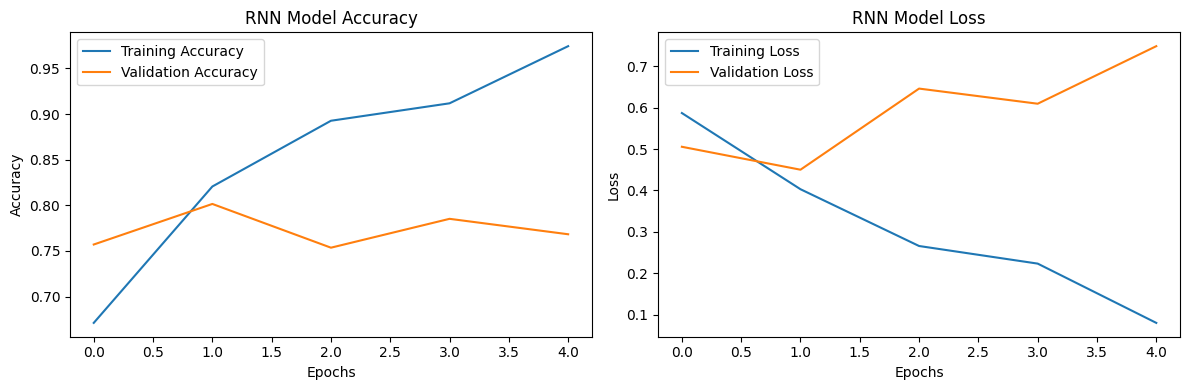

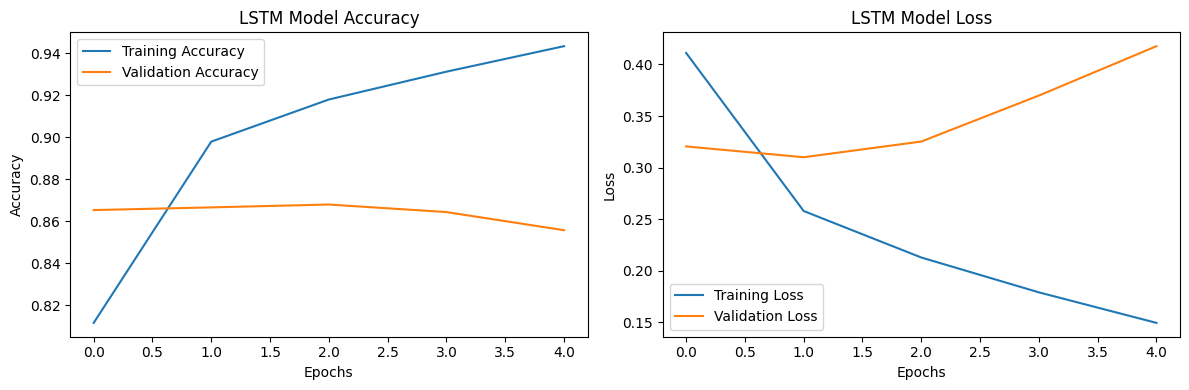

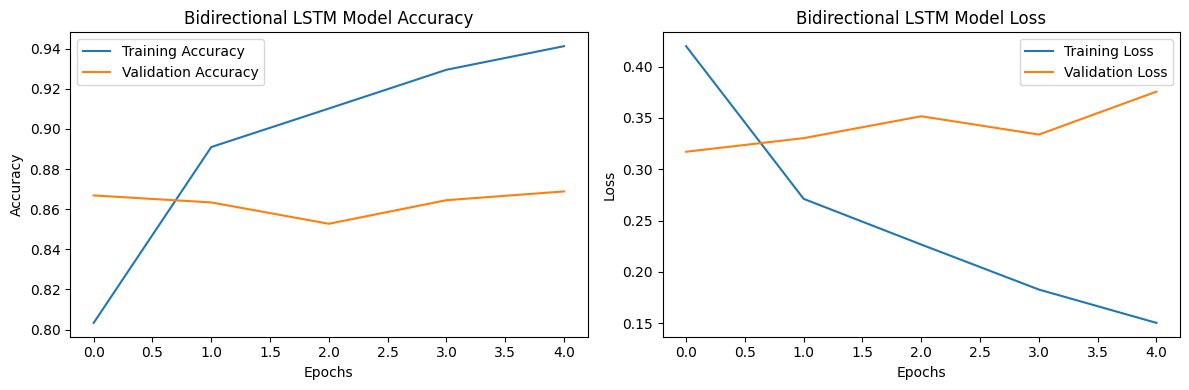

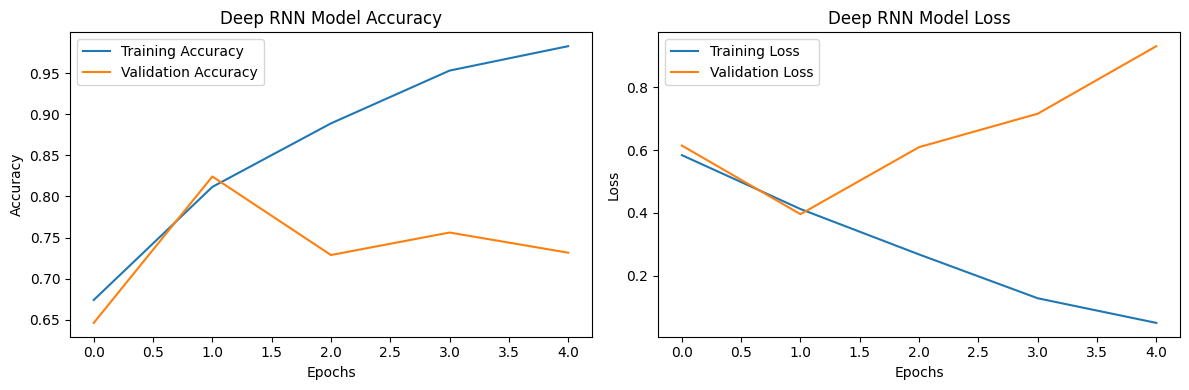

In [28]:
models = [model_rnn, model_lstm, model_bidir_lstm, model_deep_rnn]
histories = [history_rnn, history_lstm, history_bidir_lstm, history_deep_rnn]
model_names = ['RNN', 'LSTM', 'Bidirectional LSTM', 'Deep RNN']

for i, (model, history, model_name) in enumerate(zip(models, histories, model_names)):
    plt.figure(figsize=(12, 4))
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


In [31]:
y_prob_rnn = model_rnn.predict(X_test)
y_prob_lstm = model_lstm.predict(X_test)
y_prob_bidir_lstm = model_bidir_lstm.predict(X_test)
y_prob_deep_rnn = model_deep_rnn.predict(X_test)

y_pred_rnn = np.round(y_prob_rnn)
y_pred_lstm = np.round(y_prob_lstm)
y_pred_bidir_lstm = np.round(y_prob_bidir_lstm)
y_pred_deep_rnn = np.round(y_prob_deep_rnn)

782/782 [==============================] - 11s 14ms/step


In [33]:
print("Classification Report для RNN:")
print(classification_report(y_test, y_pred_rnn))

Classification Report для RNN:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75     12500
           1       0.74      0.84      0.78     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



In [34]:
print("Classification Report для LSTM:")
print(classification_report(y_test, y_pred_lstm))

Classification Report для LSTM:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     12500
           1       0.89      0.81      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [35]:
print("Classification Report для Bidirectional LSTM:")
print(classification_report(y_test, y_pred_bidir_lstm))

Classification Report для Bidirectional LSTM:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [36]:
print("Classification Report для Deep RNN:")
print(classification_report(y_test, y_pred_deep_rnn))

Classification Report для Deep RNN:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74     12500
           1       0.74      0.71      0.73     12500

    accuracy                           0.73     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.73      0.73      0.73     25000

